In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [7]:
df = pd.read_csv("/Users/thotaruchitha/Downloads/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.shape

(200, 5)

In [10]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [13]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [27]:
X = df.iloc[:,[3,4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [30]:
ssd = []
for i in range(1,11):
 kmeans = KMeans(n_clusters = i, init = 'k-means++',n_init=10, random_state = 42)  # By setting random_state=42, you ensure that every time you run your code, the algorithm picks the same random starting points for centroids. This makes your results consistent and reproducible.
                                                                                   # init="k-means++" is a smarter way of initializing the centroids to improve the KMeans algorithm's performance and help it find better clusters.
kmeans.fit(X)                                             #The fit(x) method performs the clustering, adjusting cluster centers and calculating distances to minimize the total inertia for each cluster configuration.
 ssd.append(kmeans.inertia_)                               #Inertia is the sum of squared distances between each data point and the center (centroid) of its assigned cluster.

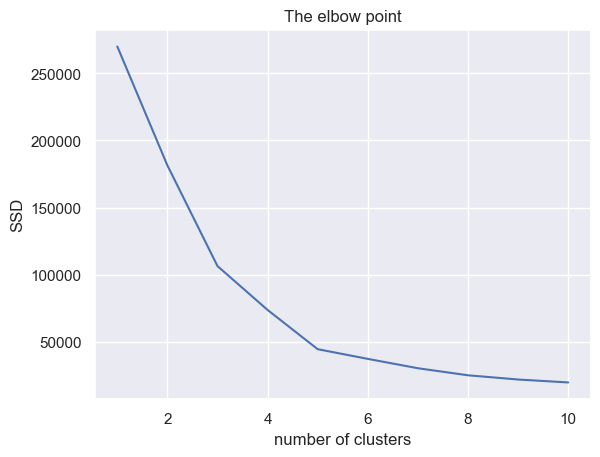

In [33]:
sns.set()
plt.plot(range(1,11),ssd)
plt.xlabel("number of clusters")
plt.ylabel("SSD")
plt.title("The elbow point")
plt.show()

In [35]:
# Training the K-Means clustering model 

kmeans = KMeans(n_clusters = 5, init = 'k-means++',n_init=10, random_state = 0)
Y= kmeans.fit_predict(X)   # fit_predict method used in clustering algorithms (and some other models) to both fit the model to the data and predict the labels (or cluster assignments) in one step.
print(Y)


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


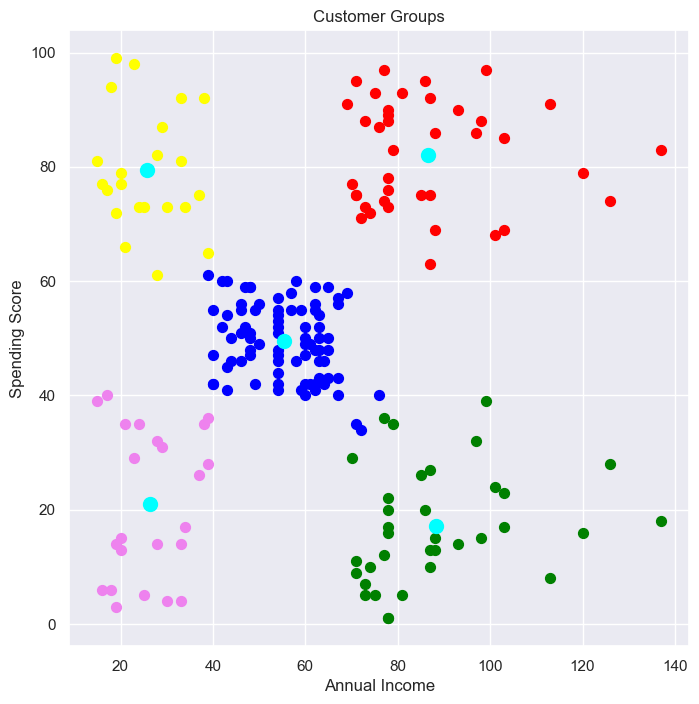

In [41]:
import matplotlib.pyplot as plt

# Assuming 'kmeans' has been fitted and 'X' is your data
plt.figure(figsize=(8, 8))

# Scatter plots for each cluster using the labels from kmeans.labels_
plt.scatter(X[kmeans.labels_ == 0, 0], X[kmeans.labels_ == 0, 1], s=50, c="green", label="Cluster 1")
plt.scatter(X[kmeans.labels_ == 1, 0], X[kmeans.labels_ == 1, 1], s=50, c="blue", label="Cluster 2")
plt.scatter(X[kmeans.labels_ == 2, 0], X[kmeans.labels_ == 2, 1], s=50, c="red", label="Cluster 3")
plt.scatter(X[kmeans.labels_ == 3, 0], X[kmeans.labels_ == 3, 1], s=50, c="yellow", label="Cluster 4")
plt.scatter(X[kmeans.labels_ == 4, 0], X[kmeans.labels_ == 4, 1], s=50, c="violet", label="Cluster 5")

# Scatter plot for the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c="cyan", label="Centroids")

# Title and labels
plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

# Show the plot
plt.show()
